In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
#import sys
#!conda install --yes --prefix {sys.prefix} scikit-learn
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
dataset = np.load('proyecto_training_data.npy')
print(dataset)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [8]:
x= np.array([[3,-5],[5,1],[6,2],[2,4],[-1,3],[7,8],[9,7],[6,5],[4,1],[4,1]])
x
x = dataset
numrows = len(x)-round(len(x) * 0.2)
datos_entrenamiento = x[:numrows, ]
datos_entrenamiento = np.array(datos_entrenamiento)
#print(datos_entrenamiento)

In [9]:
mean = np.nanmean(datos_entrenamiento, axis=0)
print(mean)
minimium = np.nanmin(datos_entrenamiento, axis=0)
print(minimium)
maximium = np.nanmax(datos_entrenamiento, axis=0)
print(maximium)
p2p = maximium-minimium
print(p2p)
std = np.nanstd(datos_entrenamiento, axis=0)
print(std)


[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
[3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
[7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
[7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]
[7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


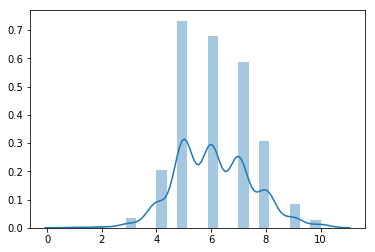

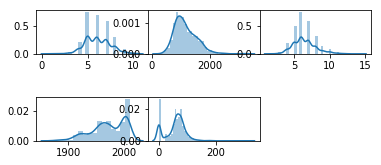

In [10]:
datos_entrenamiento = np.nan_to_num(datos_entrenamiento)
#print(datos_entrenamiento)
#print(datos_entrenamiento[:,1])
ax = sns.distplot(datos_entrenamiento[:,1])
f = plt.figure()
for i in range(5):
    f.add_subplot(3, 3, i+1)
    sns.distplot(datos_entrenamiento[:,i+1])
plt.subplots_adjust(wspace = 0)
plt.subplots_adjust(hspace = 1)
plt.show()

In [11]:
covxy = np.corrcoef(datos_entrenamiento[:,5],datos_entrenamiento[:,0])[0,1]
print(covxy)
covxy = np.corrcoef(datos_entrenamiento,rowvar=0)[0][1:]
covxy

0.22620750686155083


array([0.79399005, 0.6162887 , 0.56470694, 0.53417069, 0.22620751])

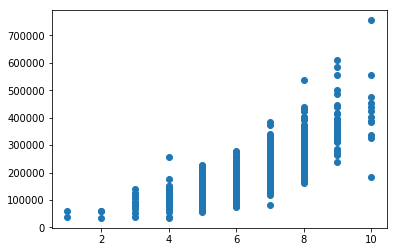

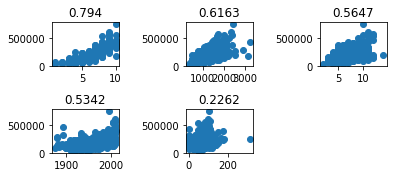

In [12]:
plt.scatter(datos_entrenamiento[:,1],datos_entrenamiento[:,0])
f = plt.figure()
for i in range(5):
    f.add_subplot(3, 3, i+1)
    plt.scatter(datos_entrenamiento[:,i+1],datos_entrenamiento[:,0])
    plt.title(round(covxy[i],4))
plt.subplots_adjust(wspace = 1)
plt.subplots_adjust(hspace = 1)
plt.show()



In [142]:
#print(lista_errores)
def graficaErrores(lista_errores):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 


    ax.grid()
    ax.set_xlabel('# de iteración')
    ax.set_ylabel('Error')
    ax.set_title('Grafica de # de iteracion vrs error')
    ax.plot(lista_errores)


    plt.show()

Error en iteración [3] 1380901403.272406
Error en iteración [6] 1377678843.5794816
Error en iteración [9] 1375676110.2626548
Error en iteración [12] 1374412354.1677668
Error en iteración [15] 1373596285.6592128
Error en iteración [18] 1373051446.7892888
Error en iteración [21] 1372670942.5457041
Error en iteración [24] 1372390017.8696294
Error en iteración [27] 1372169445.3149974
Error en iteración [30] 1371985461.5964727


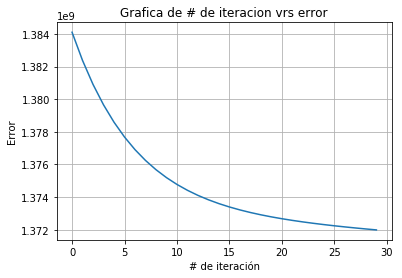

Error en iteración [3] 1970488254.8917584
Error en iteración [6] 1969011609.8811235
Error en iteración [9] 1968445460.771987
Error en iteración [12] 1968228396.9580789
Error en iteración [15] 1968145172.893635
Error en iteración [18] 1968113263.1606212
Error en iteración [21] 1968101027.4080255
Error en iteración [24] 1968096334.68473
Error en iteración [27] 1968094533.9685326
Error en iteración [30] 1968093842.051562


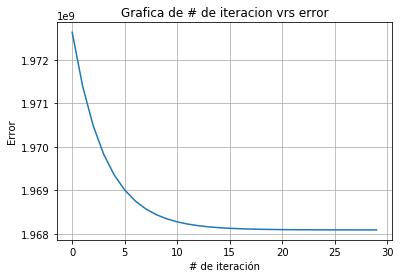

In [165]:
def mod_regresion_lineal(x,y,epochs,imprimir_error_cada,lr,graficar):
    m=np.mean(y)/np.mean(x)
    b= np.mean(y)-(m*np.mean(x))
    lista_errores = []
    lista_modelos = {}
    n = 0;
    for i in range(epochs):
        matX = np.ones((len(x),1), int)
        matX = np.column_stack((x,matX))
        parametros = [m,b]
        #print(parametros)
        yhat = np.matmul(matX,parametros)
        #print(yhat)
        error = np.mean(np.power((y - yhat),2)) /2
        #print(error)
        lista_errores.append(error)
        subY = np.array(yhat-y)

        gradientem = np.mean(subY* matX[:,0])
        gradienteb = np.mean(subY*matX[:,1])
        subY=subY[:,np.newaxis]
        #print(subY,matX)
        gradiente = (subY*matX).mean(0)
        m = parametros[0]-(lr*gradiente[0])
        b = parametros[1]-(lr*gradiente[1])
        lista_modelos[i]=[m,b]
        #print(m,b)
        n+=1
        if (n ==3):
            if(graficar):
                print("Error en iteración ["+str (i+1)+"]",error)
            n=0;
    if(graficar):
        graficaErrores(lista_errores)
    return lista_modelos,lista_errores
x = datos_entrenamiento[:,1]
y = datos_entrenamiento[:,0]
lista_modelosx1,lista_erroresx1=mod_regresion_lineal(datos_entrenamiento[:,1],datos_entrenamiento[:,0],30,3,0.002,True)
lista_modelosx2,lista_erroresx2=mod_regresion_lineal(datos_entrenamiento[:,2],datos_entrenamiento[:,0],30,3,0.0000001,True)

------------Modelo x1---------------


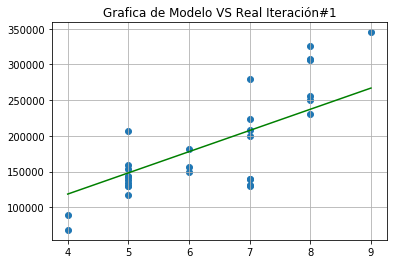

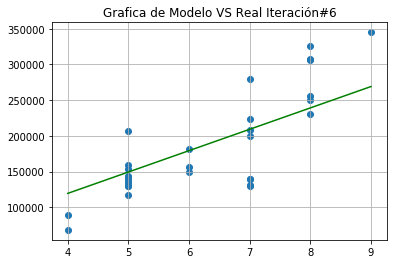

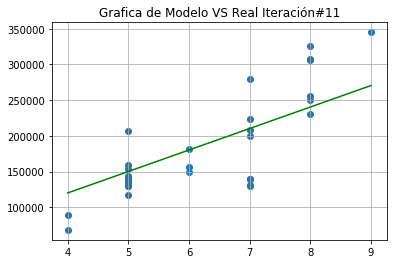

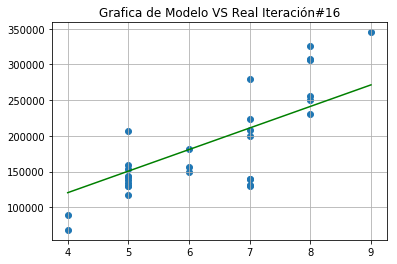

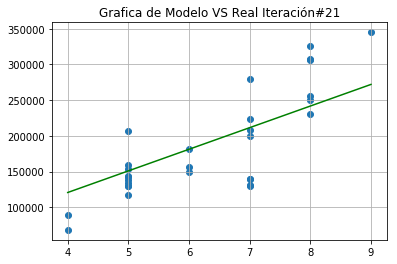

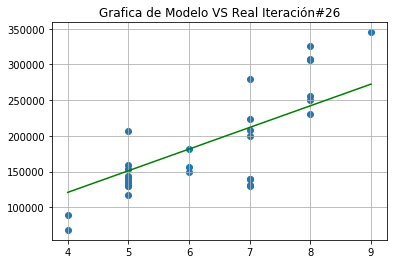

------------Modelo x2---------------


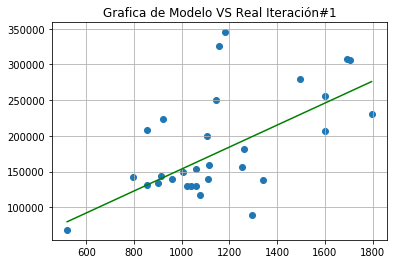

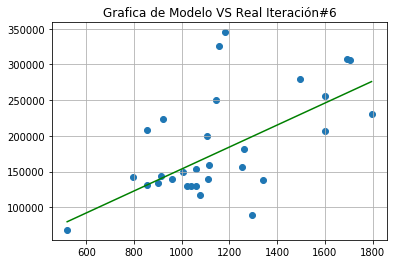

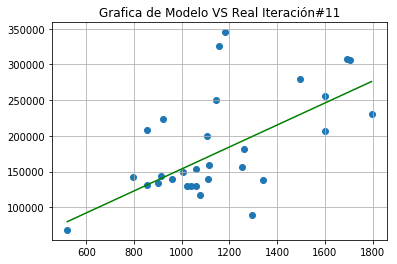

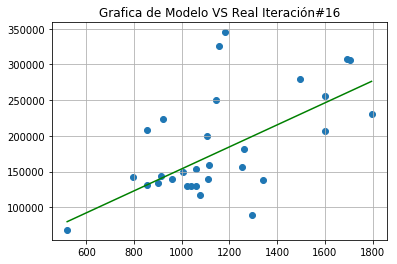

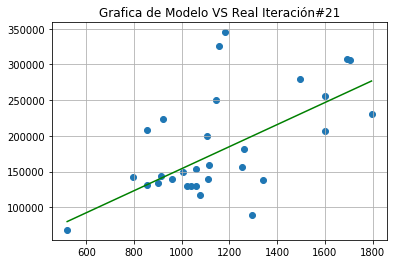

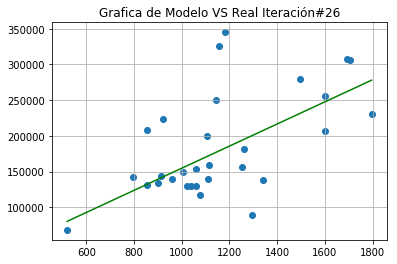

In [163]:
def graficarRectaModelo(lista_modelos,n,x1,y1,label):
    print("------------Modelo "+label+"---------------")
    lists = sorted(lista_modelos.items())
    index, parametros = zip(*lists)
    parametros = np.array(sorted(parametros))
    #parametros = parametros[::n]
    for i in range(0,len(parametros),n):
        plt.scatter(x1,y1)
        m = parametros[i,0]
        b = parametros[i,1]
        x = np.linspace(np.min(x1), np.max(x1), len(parametros))
        y = (x*m)+b
        plt.grid()
        plt.title('Grafica de Modelo VS Real Iteración#'+str(i+1))
        plt.plot(x,y,"g")
        plt.show()
l = len(lista_modelos)
x1 = datos_entrenamiento[:l,1]
x2 = datos_entrenamiento[:l,2]
y = datos_entrenamiento[:l,0]
graficarRectaModelo(lista_modelosx1,5,x1,y,"x1")
graficarRectaModelo(lista_modelosx2,5,x2,y,"x2")

In [124]:
#SEACK LEARN
x= datos_entrenamiento[:,1]
y= datos_entrenamiento[:,0]
def scikit_learn(x,y):
    x=x[:,np.newaxis]
    reg = LinearRegression().fit(np.array(x), np.array(y))
    #print(reg.score(x, y))
    #print(reg.coef_)
    #print(reg.intercept_) 
    return reg.predict(x)

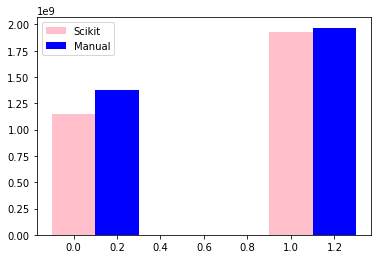

In [166]:
x= datos_entrenamiento[:,1]
y= datos_entrenamiento[:,0]
yhat = scikit_learn(x,y)
lista_modelos,lista_errores1=mod_regresion_lineal(x,y,30,3,0.002,False)
x= datos_entrenamiento[:,2]
yhat2 = scikit_learn(x,y)
lista_modelos,lista_errores2=mod_regresion_lineal(x,y,30,3,0.0000001,False)
errorX1_sci = np.mean(np.power((y - yhat),2)) /2
errorX2_sci = np.mean(np.power((y - yhat2),2)) /2
errorSci = [errorX1_sci,errorX2_sci]
errorManual = [np.mean(lista_errores1),np.mean(lista_errores2)]

x_range = np.arange(2)
fig, ax = plt.subplots()
index = np.arange(2)
ax.bar(index, errorSci, width=0.2, color="pink",label='Scikit')
ax.bar(index+0.2, errorManual, width=0.2, color="blue",label='Manual')
#plt.bar(2, errorX2, width=0.2, color="pink",label='Scikit')
ax.legend()

plt.show()


